# Hypothesis

* [single-correlation] The number of hurricanes and typhoons are correlated with the surface temperature of each region?

# import library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import  multipletests

# read & clean  datasets

In [2]:
temp_us_year_df = pd.read_csv("data/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry_usaonly_year.csv").drop("Unnamed: 0", axis=1)
temp_us_year_df.head()

,year,ave_temp,ave_temp_uncer,month,day
0,1768,5.57275,3.757000,10.5,1.0
1,1769,10.44650,3.693375,6.5,1.0
2,1770,NaN,NaN,6.5,1.0
3,1771,NaN,NaN,6.5,1.0
4,1772,NaN,NaN,6.5,1.0


In [3]:
temp_us_year_df.shape

(246, 5)

In [4]:
hurri_df = pd.read_csv("data/hurricane-database/atlantic.csv")
hurri_df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [5]:
hurri_df.shape

(49105, 22)

In [6]:
hurri_df.columns = list(hurri_df.columns.str.lower().str.replace(" ","_"))
hurri_df.columns

Index(['id', 'name', 'date', 'time', 'event', 'status', 'latitude',
       'longitude', 'maximum_wind', 'minimum_pressure', 'low_wind_ne',
       'low_wind_se', 'low_wind_sw', 'low_wind_nw', 'moderate_wind_ne',
       'moderate_wind_se', 'moderate_wind_sw', 'moderate_wind_nw',
       'high_wind_ne', 'high_wind_se', 'high_wind_sw', 'high_wind_nw'],
      dtype='object')

In [7]:
hurri_df["date"] = hurri_df["date"].astype(str)
hurri_df.dtypes

id                  object
name                object
date                object
time                 int64
event               object
status              object
latitude            object
longitude           object
maximum_wind         int64
minimum_pressure     int64
low_wind_ne          int64
low_wind_se          int64
low_wind_sw          int64
low_wind_nw          int64
moderate_wind_ne     int64
moderate_wind_se     int64
moderate_wind_sw     int64
moderate_wind_nw     int64
high_wind_ne         int64
high_wind_se         int64
high_wind_sw         int64
high_wind_nw         int64
dtype: object

In [8]:
hurri_df["year"] = hurri_df["date"].str[:4]
hurri_df["year"] = hurri_df["year"].astype(int)
hurri_df.head()

,id,name,date,time,event,status,latitude,longitude,maximum_wind,minimum_pressure,...,low_wind_nw,moderate_wind_ne,moderate_wind_se,moderate_wind_sw,moderate_wind_nw,high_wind_ne,high_wind_se,high_wind_sw,high_wind_nw,year
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851


# compare the number of hurricanes over the period

In [9]:
hurri_id_gr = hurri_df.groupby(by=["id"])
hurri_id_df = hurri_id_gr.max().reset_index()
hurri_id_df.head()

,id,name,date,time,event,status,latitude,longitude,maximum_wind,minimum_pressure,...,low_wind_nw,moderate_wind_ne,moderate_wind_se,moderate_wind_sw,moderate_wind_nw,high_wind_ne,high_wind_se,high_wind_sw,high_wind_nw,year
0,AL011851,UNNAMED,18510628,2100,L,TS,31.0N,99.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
1,AL011852,UNNAMED,18520830,1800,L,TS,41.0N,88.6W,100,961,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1852
2,AL011853,UNNAMED,18530805,1200,,TS,32.5N,69.0W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1853
3,AL011854,UNNAMED,18540627,1800,L,TS,28.0N,98.5W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
4,AL011855,UNNAMED,18550806,1200,,HU,22.2N,98.0W,90,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1855


In [10]:
hurri_year_count_df = pd.DataFrame(hurri_id_df["year"].value_counts()).reset_index()
hurri_year_count_df.columns = ["year", "num_of_hurri"]
hurri_year_count_df = hurri_year_count_df.sort_values("year").reset_index()
hurri_year_count_df.head()

,index,year,num_of_hurri
0,130,1851,6
1,143,1852,5
2,104,1853,8
3,142,1854,5
4,140,1855,5


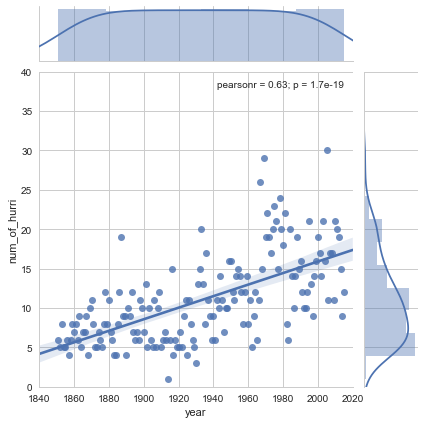

In [11]:
sns.jointplot("year", "num_of_hurri", data=hurri_year_count_df, kind="reg", xlim=(1840, 2020), ylim=(0,40))

# compare the strength (minimum pressure) of hurricane over the period

In [12]:
hurri_year_gr = hurri_df.groupby(by="year")
hurri_year_min_df = hurri_year_gr.min().reset_index()
hurri_year_min_df.head()

,year,id,name,date,time,event,status,latitude,longitude,maximum_wind,...,low_wind_sw,low_wind_nw,moderate_wind_ne,moderate_wind_se,moderate_wind_sw,moderate_wind_nw,high_wind_ne,high_wind_se,high_wind_sw,high_wind_nw
0,1851,AL011851,UNNAMED,18510625,0,,HU,12.0N,100.0W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,1852,AL011852,UNNAMED,18520819,0,,HU,16.1N,58.5W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,1853,AL011853,UNNAMED,18530805,0,,HU,12.0N,23.2W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,1854,AL011854,UNNAMED,18540625,0,,HU,25.0N,100.0W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,1855,AL011855,UNNAMED,18550806,0,,HU,12.0N,24.0W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


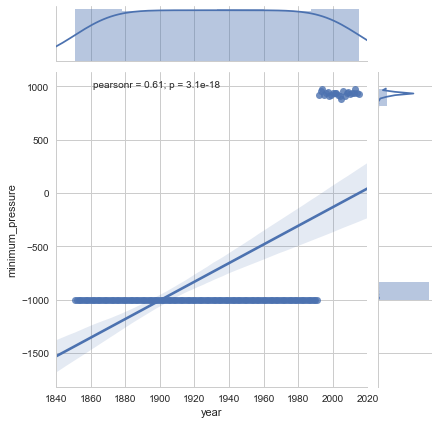

In [13]:
sns.jointplot("year", "minimum_pressure", data=hurri_year_min_df, kind="reg", xlim=(1840, 2020))

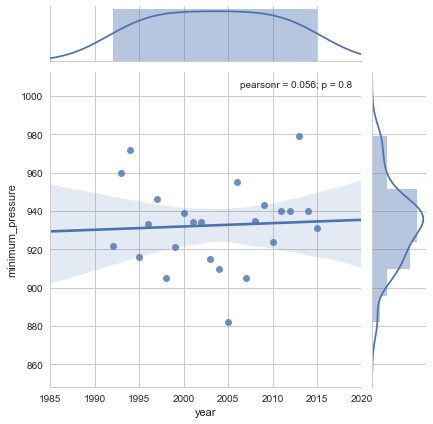

In [14]:
hurri_year_min_1991_df = hurri_year_min_df[hurri_year_min_df["year"] > 1991]
sns.jointplot("year", "minimum_pressure", data=hurri_year_min_1991_df, kind="reg", xlim=(1985, 2020))

# compare the strength (maximum_window) of hurricane over the period

In [15]:
hurri_year_max_df = hurri_year_gr.max().reset_index()
hurri_year_max_df.head()

,year,id,name,date,time,event,status,latitude,longitude,maximum_wind,...,low_wind_sw,low_wind_nw,moderate_wind_ne,moderate_wind_se,moderate_wind_sw,moderate_wind_nw,high_wind_ne,high_wind_se,high_wind_sw,high_wind_nw
0,1851,AL061851,UNNAMED,18511019,2100,L,TS,48.5N,99.8W,100,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,1852,AL051852,UNNAMED,18521011,2100,L,TS,41.0N,90.4W,100,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,1853,AL081853,UNNAMED,18531022,1800,,TS,48.0N,95.0W,130,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,1854,AL051854,UNNAMED,18541022,2100,L,TS,40.2N,98.5W,110,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,1855,AL051855,UNNAMED,18550917,1800,L,TS,54.0N,98.0W,110,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


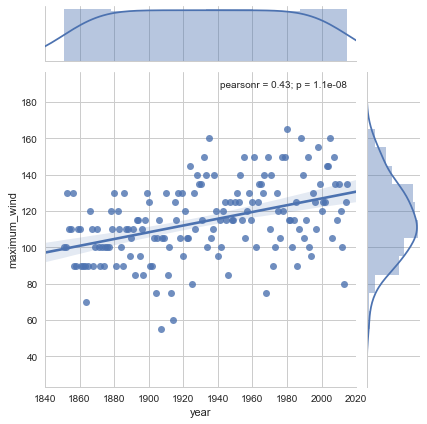

In [16]:
sns.jointplot("year", "maximum_wind", data=hurri_year_max_df, kind="reg", xlim=(1840, 2020))

# merge data of temperature and hurricane

In [17]:
hurri_year_max_df.shape

(165, 23)

In [18]:
hurri_year_count_df.shape

(165, 3)

In [19]:
hurri_count_maxwin_year = pd.concat([hurri_year_count_df, hurri_year_max_df[["year", "maximum_wind"]]], axis=1).drop("index", axis=1)
hurri_count_maxwin_year = hurri_count_maxwin_year.iloc[:,[0,1,3]]
hurri_count_maxwin_year.head()

,year,num_of_hurri,maximum_wind
0,1851,6,100
1,1852,5,100
2,1853,8,130
3,1854,5,110
4,1855,5,110


In [20]:
temp_hurri_df = pd.merge(hurri_count_maxwin_year, temp_us_year_df, on="year")
temp_hurri_df.head()

,year,num_of_hurri,maximum_wind,ave_temp,ave_temp_uncer,month,day
0,1851,6,100,8.657500,1.526000,6.5,1.0
1,1852,5,100,8.183083,1.393750,6.5,1.0
2,1853,8,130,8.459917,1.291333,6.5,1.0
3,1854,5,110,8.821250,1.484083,6.5,1.0
4,1855,5,110,8.459417,1.550417,6.5,1.0


# correlation

In [21]:
mask = np.ones_like(temp_hurri_df[["num_of_hurri", "maximum_wind", "ave_temp"]].corr(), dtype=np.bool)
mask = np.triu(mask)
mask

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

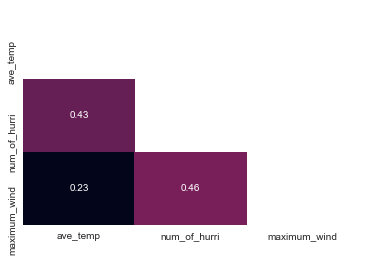

In [22]:
sns.heatmap(temp_hurri_df[["ave_temp", "num_of_hurri", "maximum_wind"]].corr(), annot=True, mask=mask, cbar=False)

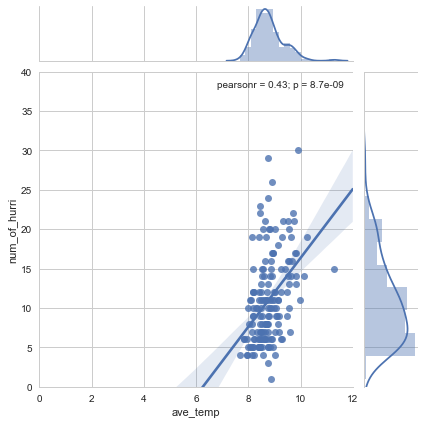

In [23]:
sns.jointplot("ave_temp", "num_of_hurri", data=temp_hurri_df, kind="reg", xlim=(0,12), ylim=(0,40))

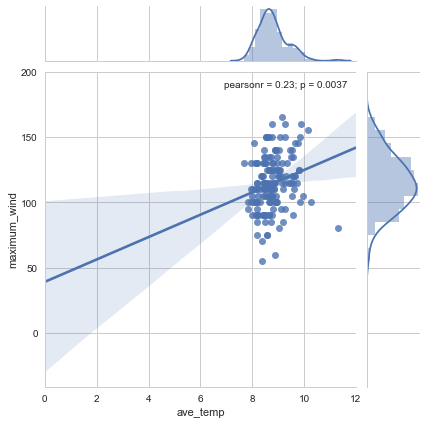

In [24]:
sns.jointplot("ave_temp", "maximum_wind", data=temp_hurri_df, kind="reg", xlim=(0,12))